# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [45]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print "\nBasic statistics of given data\n", data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Basic statistics of given data
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73

In [46]:
#Feature Selection
#The objective is to select the features which represent the powerfulinformation about our dataset. 
#VarianceThreshold is used since the PCA starts and work with data points with high variance.
#Removing variance wherever low.
#Univariate feature selection seems to be a good fit for Supervised learning techniques.i.e for
# regression and classification

from sklearn.feature_selection import VarianceThreshold
X = data
sel = VarianceThreshold()
sel.fit_transform(X)

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ..., 
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [47]:
X.shape

(440, 6)

The above results by applying VarianceThreshold seems to indicate that all the features seem to be important and contribute well to the overall information representation. Thus it is evident to proceed with a given 6 dimensional representation for PCA.

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

The objective of the Feature transformation is to consider all given features and to arrive at reduced number of features either at the order of high variance (PCA) or by converting the input features into entirely a new set of features which are mutually exclusive in their properties (ICA).

In our dataset, 
PCA- Dimenionality reduction happens with respect choosing the principle componenets with high variations of data points in the given data. The more variant of the data are in one particular direction ,they will be chosen first as they represent most information of the given dataset. Then the second component with less variance than the first one considered next. Thus, with respect to level of variance as high spread the data is, the PCA reduces the number of features to less.

With the above definition and with the help of Basic statistics described above, we can hope that 'Fresh' products are likely to dominate the First principal component among all the products as it caries the very high standard deviation (12647.3) followed by Grocery products (9503.2).

ICA- Independent Componenet Analysis works to reduce the number of features in such a way ,the reduced features have mutually exclusive properties, i.e. they reduced features don't share any common observables. This new features are made up features from the given input features.

With the above definition for ICA and with the help of the basic statisticas described above, we can expect a feature which indicates any of the following:

"Type of selling patterns of products. One Independent components may indicate the type of customers who buy few products together for example both 'Detergents_Paper' and 'Delicatessen'"


###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


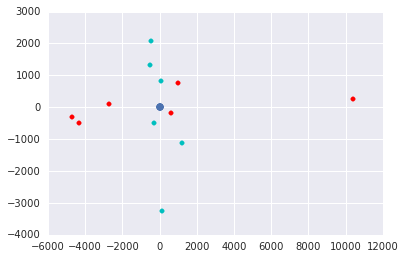

In [48]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
n = min(data.shape)
pca = PCA(n_components=n)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

first_pc=pca.components_[0]
second_pc=pca.components_[1]
third_pc=pca.components_[2]
transformed_data=pca.transform(data)

for ii,jj in zip(transformed_data, data):
    plt.scatter(first_pc[0]*ii[0],first_pc[1]*ii[1],color="r")
    plt.scatter(second_pc[0]*ii[0],second_pc[1]*ii[1],color="c")
    
x = np.arange(6)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')



#plt.scatter(third_pc[0]*ii[0],third_pc[1]*ii[1],color="b")

#plt.scatter(jj[0],jj[1],color="b")

#plt.scatter(xrange(1,n+1), pca.explained_variance_ratio_)
#plt.xlabel('Dimension', size=15)
#plt.ylabel('Variance', size=15)
#plt.ylim(0)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

PCA results in the first 2 componenets with very high variance whereas after the second componenet, the variance decreases drastically for third componenet and so on. The fraction of influence of first 2 dimensions combinely are  0.45961362  and 0.40517227, totalling more than 86% of total variance. 

Total spread over among all the dimensions , these first 2 dimensions themseleves carry more than 86% of the total spread. Remaining 4 dimensions carry in total of 14% with small reductions from 3rd on.

So, i would choose the first 2 number of componenets if i have to. It may benefit for analysis choosing more number of dimensions, but that may overfit in testing test.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

These dimensions represent the vectors which all are the combinations of multiple input features when projecting from one direction for example. Its exactly looking at the data points on the space, and inserting a hyperplane which has closer distance to most of the data points in our dataset. In our customers dataset, we found using PCA that there can be 2 such dimensions (planes) which can represent the most variance of our data. By doing so, essentially we are bringing down the 6 dimensional spaces into 2 dimensional spaces (6 features in our case) which can represent most of the information of a given data (86% in our case). In this way, we are computationally inexpensive without loosing much information.

First Principle component has co-efficients as follows:
    Fresh	            -0.97653685
    Milk	            -0.12118407
    Grocery	            -0.06154039
    Frozen	            -0.15236462
    Detergents_Paper	 0.00705417
    Delicatessen	    -0.06810471
    
    
The first principle componenet is more of very closely depicting the 'Fresh' products as the co-efficienct has a big impact overall.

It is likely that more consumers tend to by default are buying 'Fresh' products among all.

Second Principle component has co-efficients as follow:
    Fresh	              -0.11061386
    Milk	               0.51580216
    Grocery	               0.76460638
    Frozen	              -0.01872345
    Detergents_Paper	   0.36535076
    Delicatessen	       0.05707921
    
As we can see the second principle components primarily consists of information pertaining to Grocery, Milk and Detergents as they score 0.76460638, 0.51580216, 0.36535076 respectively. This second dimension shows consumers in an average around 40% were buying the products which is a combination of Milk, Grocer and Detergents.

By considering both of the above 2 principle components, Frozen and Delicatessen are bought very less and negligibly influence our decisions.

We can infer from the above two Principal components to make out the two different type of customers who buy and most influence the sales and marketing decisions.

First Principal component (PC) has some customers who purchase a lot of fresh and some customers who buy very little fresh. This can be inferred from the biplot (below) where the small buyers are shown left to the bottom left to the plot. These type of customers (First PC) may be Restaurant owners who buys Fresh products a lot. This is due to the fact that the daily consumption and continous requirement of fresh products by Restaurants. Here they may not have more storage facilities to keep the products for next day. These type of customers likely to prefer their products getting delivered in morning or even in evening as most of the restaurant businesses run peak in evening times.

Second type of Customers (Second PC) may be the combination of small shop owners who run Coffee Shops and eateries. They assume considerable size in the customers base where most of them need products in their morning schedule. As they are small shop owners, they are less likely to have a storage/cold facilities for keeping the things for next day. Though they are expected to have storage for emergency needs,they often expect the delivery every morning.

###ICA

In [49]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data_scaled = scale.fit_transform(data)

n = min(data.shape)
ica = FastICA(n_components=n, random_state=42)
ica.fit(data_scaled)

# Print the independent components
print ica.components_

[[-0.0109083  -0.00108579  0.00730777  0.05405594 -0.00254136 -0.01675677]
 [ 0.00253788 -0.0123283   0.06912878  0.00142375 -0.01374853 -0.00544097]
 [-0.00490605 -0.00153897 -0.00562146 -0.002525    0.00238444  0.05092947]
 [-0.00336282  0.01863001  0.10899024 -0.00723244 -0.13338644 -0.0160228 ]
 [-0.05026646  0.00647203  0.00748246  0.00322414 -0.01147139  0.0027079 ]
 [-0.00193854 -0.07245463  0.05647623  0.0016736  -0.0171404   0.01695592]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
IC1,-0.010908,-0.001086,0.007308,0.054056,-0.002541,-0.016757
IC2,0.002538,-0.012328,0.069129,0.001424,-0.013749,-0.005441
IC3,-0.004906,-0.001539,-0.005621,-0.002525,0.002384,0.050929
IC4,-0.003363,0.018630,0.108990,-0.007232,-0.133386,-0.016023
IC5,-0.050266,0.006472,0.007482,0.003224,-0.011471,0.002708
IC6,-0.001939,-0.072455,0.056476,0.001674,-0.017140,0.016956


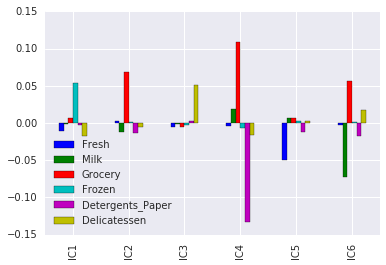

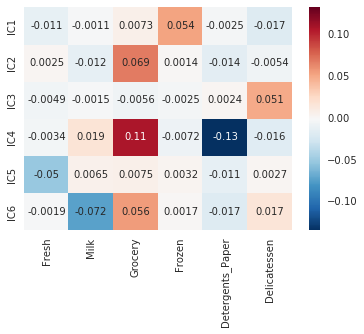

In [50]:
# Print the independent components
from IPython.display import display
import seaborn as sns

ica_df = pd.DataFrame(ica.components_, columns=list(data.columns), index=["IC1","IC2","IC3","IC4","IC5","IC6"])

display(ica_df)
ica_df.plot(kind = 'bar')
plt.figure()
sns.heatmap(ica_df, annot=True)

(-0.25, 1)

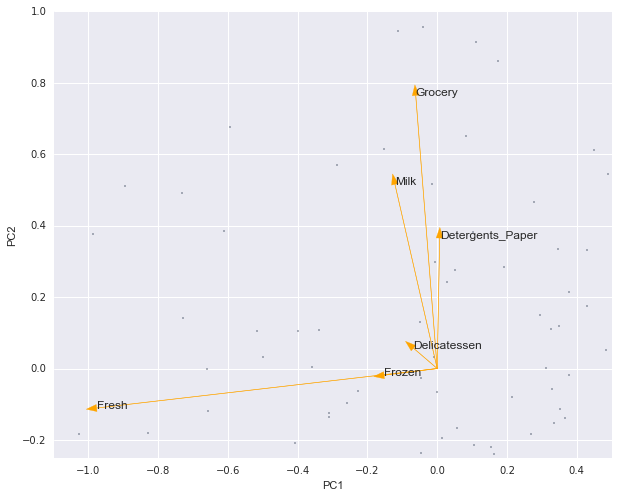

In [51]:
import pandas as pd
from sklearn.decomposition import PCA

def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

ax = biplot(data)
# Play around with the ranges for scaling the plot
ax.set_xlim([-1.1, .5])
ax.set_ylim([-.25, 1])

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
The vectors values which we found are those with highly independent statistical hidden variables. In our dataset, the observables are:

    Fresh	              
    Milk	              
    Grocery	              
    Frozen	              
    Detergents_Paper	  
    Delicatessen	      
    
    The hidden variables (Independent Component Analysis coefficients) contains the varying information levels of each observable combined together.
  
The 1st Independent component:
This independent component shows that there are more customers buying Frozen food and very less customers buy Delicatesan Food.

The 2nd independent component:
This Independent component has the information that Grocery products are most bought and very very little of Detergents_paper.

The 3rd independent component:

This Independent component shows the information where the Delicatessen products are bought more in comparison. Remaining products are bought in similar quantities.

The 4th independent component:

This independent component is similar to IC2 where there are more of Grocery products are bought. In comparision , Detergents and paper products are bought less.

The 5th independent component:
This Independent component is a collection of information where all of the products except Fresh products are bought in similar quantities.

The 6th independent component:
This independent component shows that , it has more information about Grocery product which is bought at high quantity and Milk products least.

From the above inferences we can note the following:

1.Customers who buy lot of groceries, often dont buy Detergents_paper together. This is also applicable closely to Milk. These type of customers are likely to be owning Groceries shops as their main business.(IC2, IC4 & IC6)

2. Customers who buy Delicatessens or Frozen products dont often buy anything else at all. They shows no interest in any other products if they are either Frozen products customers or the customers who buy a prepared food/delicacies.(IC2 & IC3)

3. There is a type of consumers who all are small scale owners who buy stuff to keep for long time and sell. They hardle buy Fresh stuff. (IC5)

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

Advantages of K-means clustering:

1. The scalability is high.i.e.it can be used for large number of samples.
2. General Purpose clustering technique and can be applied any type of samples.
3. K-means has to calculate the mean everytime in the cluster whereas GMM calculates a maximum likelihood Gaussian distribution. Building a maximum likelihood Gaussian involves computing a mean AND computing a standard deviation. And since points do not have hard assignments to clusters more points are used in the computation for each cluster. Thus, K-means clustering is usually more eﬃcient run-time wise.(II,V)
4. Inexpensive in comparison to other clustering methods (III)


Disadvantages of K-means clustering:

1. K-means clustering works on the basis of Inertia,i.e. it tries to position the centroids where the minimum squared error it obains. Inertia comes with an assumption that the clusters are always either convex or Isotropic, which is not always the case in real time. So, it performs poor to elongated clusters or manifolds with irregular shapes (IV,V).

2. Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.(IV,V)

3. Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. [One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference. ](IV).

Advantages of Gaussian Mixture Model:

1. Speed: It is the fastest algorithm for learning mixture models

2. Agnostic: As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

Disadvantages of Gaussian Mixture Model:

1. The main difficulty in learning Gaussian mixture models from unlabeled data is that it is one usually doesn’t know which points came from which latent component (if one has access to this information it gets very easy to fit a separate Gaussian distribution to each set of points).

2. The GMM object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. Sometimes, EM does not converge. Neither it will diverge as it works with probability.

3. GMM comes with the limitaton of scalability with number of parameters to make the categorization as complex.(I)

4. Singularities:	when one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.

5. Number of components: This algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.


(I) http://scikit-learn.org/stable/modules/clustering.html#clustering
(II) https://www.quora.com/What-are-the-pros-and-cons-of-kmeans-vs-hierarchical-clustering
(III) http://stats.stackexchange.com/questions/58855/why-do-we-use-k-means-instead-of-other-algorithms
(IV) http://scikit-learn.org/stable/modules/clustering.html#k-means
(V) https://discussions.udacity.com/t/k-means-vs-gmm-speed/161658
(VI) https://www.udacity.com/course/viewer#!/c-ud262/l-644878538/m-638188646

The following are the  observations in our dataset:

1. The data has wide range of products bought by different customers base. The standard deviation of products varying from 2820 to 12647.

2. Data is comparatively small. i.e. 441 samples. But in increasing order, the samples are likely to grow.

Considering the above observations about our data in combination with the computation time, variation of data, K-means looks out to be the best fit for our data set.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [52]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [53]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data) # Transforming the data to a Cluster Distance space
reduced_data_df = pd.DataFrame(reduced_data[:10])  # print upto 10 elements
print reduced_data_df

              0             1
0   -650.022122   1585.519090
1   4426.804979   4042.451509
2   4841.998707   2578.762176
3   -990.346437  -6279.805997
4 -10657.998731  -2159.725815
5   2765.961593   -959.870727
6    715.550892  -2013.002266
7   4474.583667   1429.496972
8   6712.095397  -2205.909156
9   4823.634354  13480.559205


In [54]:
reduced_data.shape

(440L, 2L)

###Choosing the number of Clusters:

There are various thoughts and ways in finding out or arriving at the number of clusters for our dataset.

By default, the number of clusters are 8 in 'k-means'. Using 8 number of clusters (as minimum) will provide intuitiveley conflicting categories if we use the default number of clusters which is bigger than the number of products consumers buy ( Original dimensions are 6). This will lead to difficuly in uncovering the categories of customers. Also categorizing the customers to a huge numbers for 6 types of products may complicate the resulting steps taken to increase sales.

One of the best way to find the number of clusters is to increase the number of clusters from smaller value i.e. value of 'k' until the points assigned to each cluster have a Gaussian distribution (1,2). In our case, we chose 2 PCA's representing more than 85% of our data. So to choose reasonably, it is good to start with 2 clusters and observe. Though we can check for starting from 2 clusters and gen


(1) http://stackoverflow.com/questions/1793532/how-do-i-determine-k-when-using-k-means-clustering
(2).http://papers.nips.cc/paper/2526-learning-the-k-in-k-means.pdf

In [55]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
#Implementing K means clustering
import time
n_clusters = 2
start = time.time()
clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [56]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [57]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids=clusters.cluster_centers_
print centroids

[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]


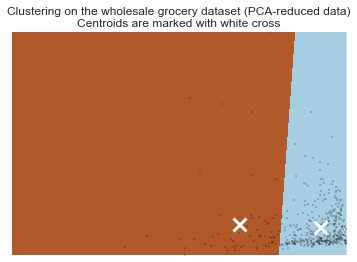

In [58]:
# Put the result into a color plot
# Voronoi diagram
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [59]:
# identify which customers are in which cluster
x = data['Cluster'] = clusters.predict(reduced_data)

# print cluster sample counts and averages
for i in xrange(clusters.n_clusters):
    count = data[x==i].shape[0]
    print 'There are %s samples in Cluster %s' % (count, i)
    print 'Here is what a Cluster %s customers buys from the wholesale distributor:' % i
    print data[x==i][list(data.columns[:-1])].mean(),'\n'

There are 375 samples in Cluster 0
Here is what a Cluster 0 customers buys from the wholesale distributor:
Fresh               7944.112000
Milk                5151.818667
Grocery             7536.128000
Frozen              2484.130667
Detergents_Paper    2872.557333
Delicatessen        1214.261333
dtype: float64 

There are 65 samples in Cluster 1
Here is what a Cluster 1 customers buys from the wholesale distributor:
Fresh               35401.369231
Milk                 9514.230769
Grocery             10346.369231
Frozen               6463.092308
Detergents_Paper     2933.046154
Delicatessen         3316.846154
dtype: float64 



Running 2 clusters does not significantly provides the ways of grouping the customers base. Based upon the above composition ,it is least likely to draw upon a conclusion in understanding the customers base. The above steps are repeated for 3 number of clusters:


In [60]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
#Implementing K means clustering with 3 clusters
import time
n_clusters = 3
start = time.time()
clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [61]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [62]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids=clusters.cluster_centers_
print centroids

[[-23978.86566553  -4445.56611772]
 [  4156.8473703   -3062.39566743]
 [  1339.44615464  25546.49074629]]


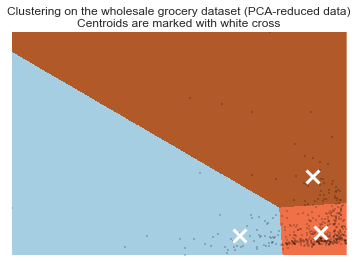

In [63]:
# Put the result into a color plot
# Voronoi diagram
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [64]:
# identify which customers are in which cluster
x = data['Cluster'] = clusters.predict(reduced_data)

# print cluster sample counts and averages
for i in xrange(clusters.n_clusters):
    count = data[x==i].shape[0]
    print 'There are %s samples in Cluster %s' % (count, i)
    print 'Here is what a Cluster %s customers buys from the wholesale distributor:' % i
    print data[x==i][list(data.columns[:-1])].mean(),'\n'

There are 60 samples in Cluster 0
Here is what a Cluster 0 customers buys from the wholesale distributor:
Fresh               35941.400000
Milk                 6044.450000
Grocery              6288.616667
Frozen               6713.966667
Detergents_Paper     1039.666667
Delicatessen         3049.466667
dtype: float64 

There are 330 samples in Cluster 1
Here is what a Cluster 1 customers buys from the wholesale distributor:
Fresh               8253.469697
Milk                3824.603030
Grocery             5280.454545
Frozen              2572.660606
Detergents_Paper    1773.057576
Delicatessen        1137.496970
dtype: float64 

There are 50 samples in Cluster 2
Here is what a Cluster 2 customers buys from the wholesale distributor:
Fresh                8000.04
Milk                18511.42
Grocery             27573.90
Frozen               1996.68
Detergents_Paper    12407.36
Delicatessen         2252.02
dtype: float64 



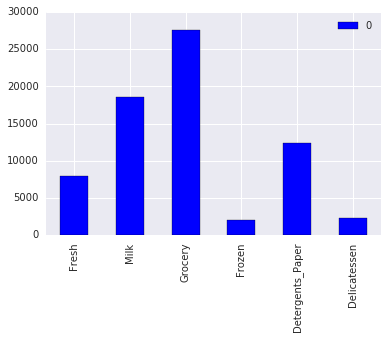

In [65]:
pd.DataFrame(data[x==i][list(data.columns[:-1])].mean()).plot(kind = 'bar')

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

There are 3 clusters identified in our case which covers the different categories of customers:


Cluster-0: This cluster/type of customers as well overall purchasing the fresh food in maximum quantity in addition to buying other categories of products as well. With fresh products they buy grocery,milk, and frozen with least of Detergents_paper and Delicatessen. These type of customers are likely to be running medium size shops. They are most likely to be restaurants which buy Fresh, grocery, milk as most of all.

Cluster-1: This type of customer is buying more of Grocery followed by Milk,Detergents_paper.They buy least of Frozen and Delicatessen. These customers are mostly running small cafe in combination with sandwich/takeaway food shops.

Cluster-2: This represents the customers who all are buying more of Fresh products. This cluster is likely to represent the Principle component-1 (PCA-1). They buy other products relatively low in quantity.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

1. Out of all the above techniques, k-means clustering in combination with PCA gives an understanding of different types of customers and the type of products they buy.

2. It segregates the types of customers into reasonably understandable categories such as Restaurants, Small cafes/Take away shops.

3. When using only PCA, even though the first component (~45%) shows the most customers belong to the category buying fresh products, the second principle component is spread over across the remaining products giving no clues about how best the customers can be categorized.

**9)** How would you use that technique to help the company design new experiments?

Answer: 


Since our first category which has a huge sampeles of customers base where most times they are likely to be restaurants with considerable revenues base. They counsume more of Fresh products and at the same time a considerable and close quantity of Grocery, Milk, Frozen and so on from high order to low order. It can be inferred that, these customers buy products very soon when they finish. For example, they keep stock for some time to sudden demand/crowd in the shop. This category is the major consumer and nullifies the statistical noises created by small group of affected and unsatisfied customers due to evening delivery.

Second category of customers are those who runs small cafes/take away shops buying varying quantities. They just buy for day to day demand on regular basis. Morning delivery to evening delivery affects them as their daily routine of  buying and storing the products changes. These customers are likely had been those are affected.

Third category of customers falls into mostly consuming the Fresh products, their experience is likley to remain when the delivery time is changed from morning to noon/evening. But that should be regular as the Fresh products are consumed sooner than other frozen/storable products.

The sales pitch may include the combination of products offers in response to buy huge quantity of Groceries,Milk, Detergents_paper for the customers category 2 (Cluster-1). This will essentially increase the margin and thus the grocery shop owner will be able to maintain the costs even by delivering at normal time as it happens now.

A/B test would help in identifying the effects of implementing new delivery methods/sales pitch and their impacts on the customers in whole. A/B testing can be done in the following ways:

1. Ask a question: Why there are complaints and unsatisfactory results from the customers?
2. Do background research: Understanding the customers types / behaviour. This is something which we have done by clustering the products quantities with the help of PCA and K-means clustering.
3. Construct a hypothesis: Providing the delivery in morning in alternate days for Fresh products only (most of Clusters-2 customers) as it has a huge consumer base.
4. Calculate the number of days you need to run the test for: Prepare and execute the morning deliveries to the customers who fall under Clusters 1, who are grossly buying all the products sparingly.
5. Test your hypothesis: Continue this process (until 6 days to say)
6. Analyze data and draw conclusions: Look if there are any consumers complain or cancelling their orders.
7. Report results to all concerned: Based upon the number of complaints received, implement the morning delivery on alternate days or construct a different hypothesis and repeat from Step 3. A different hypothesis may be to deliver in evening on alternate days.

**10)** How would you use that data to help you predict future customer needs?

With the help of the above clustering process and an inferred details. The following can be found with the help of supervised learning techniques.

1. Out of all the samples, The following products has customers where the large quantities are bought by the small ratio of buyers. This can be noted with the help of 75% value parameter of individual products quantities.i.e. 25% of the customers has more impacts on the products purchase for these products.

Basic statistics of given data
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

Max. quantity bought for Delicatessen = 47943
75 % of maximum value purchased for Delicatessen 1820.25

THis is followed by Frozen,Detergents_Paper, Milk, Grocery, Fresh.

As the clusters are cleary depicting about the customers who buy More Fresh products and more of Grocery, Milk products.There is a less information and grouping possibilities about the customers who buy Delicatessen, Frozen and Detergents products.

This can be overcome with the help of a regression technique:

One way of using this information is by correlating the quantity of Fresh products to the other products. This can be done with the help of multivariate regression:

1. Consider 'Fresh' products as target variable. Remaining products as input features.i.e. Milk, Grocery, Frozen, Detergents_paper,Delicatessen as input features. 

2. Separate the time period into either a week or two weeks so that the products quantity can be summed up to show as a single sample.

3. Make up number of samples with the given data, Cross validate, train and test it for several months. This will give a relationship between the Fresh products and other products with the help of ultivariate hypothesis.

4. Implement Time-series analysis for the products except for Fresh products.

5. Predict the quantity of 'Fresh' products for the products quantity found with the help of Time-series analysis.


As Fresh products are considerably dominating close to half of the customers main buying choice, the increase in number of customers lineary increases for Fresh products. So this linearity can be used by interchanging the input feature to Target variable and vice versa. i.e. Detergents_paper in place of Fresh products and so on.

Based upon the above analysis , the prediction of product quantities can be made, which help the shop owner to group the customers, predict the quantities and implement the new sales/marketing pitches for overall satisfaction and improvement in the business cycle.